Dataset used: https://www.kaggle.com/datasets/saurabhshahane/barkvn50

This dataset contains 5578 images and 50 categories of bark textures. Our model will be classifying this in the appropriate categories.

Initially we take the "BarkVN-50_mendeley" folder inside the "BarkVN-50", in which there are 50 folders with each having images in it for each category of bark texture, and move it to our working directory.

First we import all the necessary libraries.

In [2]:
import os 
import shutil
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

import random

I have now renamed our "BarkVN-50_mendeley" to "BarkDataset". Once that is done, I see how many folders we have in total. This is done to check if .DS_store exists or not.

In [11]:
all_categories = os.listdir("BarkDataset/")
len(all_categories)

50

In order to maintain uniformity in the file names of the images and for avoiding images with same names, I have renamed all of the files as category1.JPG, catergory2.JPG, category3.JPG and so on. For example all the images in Acacia folder are renamed as Acacia1.JPG, Acacia2.JPG, Acacia3.JPG and so on.

In [12]:


for category in sorted(all_categories):
    all_images = os.listdir("BarkDataset/" + category + "/" )
    i = 1
    for image in all_images:
        os.rename('BarkDataset/'+ category + "/" + image , 'BarkDataset/' + category + "/" + category + str(i) + ".JPG")
        i += 1

## Train-Test split
I have decided to split the dataset into a 80:20 ratio where I will use 80% of the dataset for training and the remaining 20% will be used for testing.

## Creating the training dataset
I have created a train folder in my working directory. The training data of a folder will be kept under its respective folder name. For example the data for Acacia would be kept under train/Acacia/.

In [14]:
os.makedirs("train")
for category in sorted(all_categories):
    os.makedirs("train/" + category )
    all_images = os.listdir("BarkDataset/" + category + "/")
    for image in random.sample(all_images, int(0.8 * len(all_images))):
        shutil.move("BarkDataset/" + category + "/" + image, "train/" + category + "/")

## Creating test dataset 
Similar to the train dataset, I have created a test folder. The test data of a given category will be kept under the folder name of that category. For example test data for Acacia will be under test/Acacia/.

In [15]:
os.makedirs("test")
for category in sorted(all_categories):
    os.makedirs('test/' + category)
    all_images = os.listdir("BarkDataset/" + category + "/")
    for image in all_images:
        shutil.move("BarkDataset/" + category + "/" + image, "test/" + category + "/")

### Creating a base model 

I have rescaled the images using ImageDataGenerator of tensorflow.keras library and split the dataset into training data and test data.

I have created various layers for our CV model and accuracy as a metric. After defining and compiling the model, I have trained it for 5 epochs to check the performance.

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "train/"
test_dir = "test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(50, activation="softmax") # binary activation output
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 4444 images belonging to 50 classes.
Found 1134 images belonging to 50 classes.
Metal device set to: Apple M1


2022-09-27 22:56:36.043053: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-27 22:56:36.043528: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2022-09-27 22:56:36.305213: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-27 22:56:36.555756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


139/139 [==============================] - ETA: 0s - loss: 3.6881 - accuracy: 0.0709

2022-09-27 22:56:54.600602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


139/139 [==============================] - 20s 141ms/step - loss: 3.6881 - accuracy: 0.0709 - val_loss: 3.3962 - val_accuracy: 0.1578
Epoch 2/5
139/139 [==============================] - 19s 136ms/step - loss: 2.4843 - accuracy: 0.3729 - val_loss: 2.5521 - val_accuracy: 0.3236
Epoch 3/5
139/139 [==============================] - 19s 138ms/step - loss: 0.7415 - accuracy: 0.8069 - val_loss: 2.7209 - val_accuracy: 0.3616
Epoch 4/5
139/139 [==============================] - 19s 137ms/step - loss: 0.1920 - accuracy: 0.9599 - val_loss: 3.4137 - val_accuracy: 0.3854
Epoch 5/5
139/139 [==============================] - 19s 138ms/step - loss: 0.0742 - accuracy: 0.9910 - val_loss: 3.9108 - val_accuracy: 0.3810


### As we can see that our base model is overfitting even when trained for only 5 epochs. We will try regularization

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'train/'
test_dir = 'test/'

train_datagen_augmented = ImageDataGenerator(rescale = 1./255, 
                                   horizontal_flip = True, 
                                   vertical_flip = True,
                                   height_shift_range = 0.2, 
                                   width_shift_range = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data_aug = train_datagen_augmented.flow_from_directory(train_dir, 
                                                  batch_size = 32, 
                                                  target_size = (224, 224), 
                                                  class_mode = 'categorical', 
                                                  seed = 42)
test_data = test_datagen.flow_from_directory(test_dir, 
                                            batch_size = 32, 
                                            target_size = (224, 224), 
                                            class_mode = 'categorical', 
                                            seed = 42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 5, input_shape = (224, 224, 3), activation = 'relu'), 
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 5, activation = 'relu'), 
    tf.keras.layers.MaxPool2D(2, padding = 'valid'), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(2, padding = 'valid'),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'), 
    tf.keras.layers.MaxPool2D(2, padding = 'valid'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.MaxPool2D(2, padding = 'valid'),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(50, activation = 'softmax')
])

model_2.compile(loss = 'categorical_crossentropy', 
               optimizer = tf.keras.optimizers.Adam(), 
               metrics = ['accuracy'])

history_2= model_2.fit(train_data_aug, 
                       epochs = 10, 
                       steps_per_epoch = len(train_data_aug), 
                       validation_data = test_data, 
                       validation_steps = len(test_data))

Found 4444 images belonging to 50 classes.
Found 1134 images belonging to 50 classes.
Epoch 1/10


2022-09-27 23:02:38.200114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


139/139 [==============================] - ETA: 0s - loss: 3.5933 - accuracy: 0.0900

2022-09-27 23:03:10.152198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


139/139 [==============================] - 35s 245ms/step - loss: 3.5933 - accuracy: 0.0900 - val_loss: 3.1347 - val_accuracy: 0.1887
Epoch 2/10
139/139 [==============================] - 34s 241ms/step - loss: 2.8876 - accuracy: 0.2275 - val_loss: 2.7545 - val_accuracy: 0.2557
Epoch 3/10
139/139 [==============================] - 34s 246ms/step - loss: 2.5115 - accuracy: 0.3171 - val_loss: 2.4405 - val_accuracy: 0.3430
Epoch 4/10
139/139 [==============================] - 37s 268ms/step - loss: 2.2514 - accuracy: 0.3733 - val_loss: 2.0500 - val_accuracy: 0.4665
Epoch 5/10
139/139 [==============================] - 39s 282ms/step - loss: 2.0622 - accuracy: 0.4176 - val_loss: 1.9221 - val_accuracy: 0.4921
Epoch 6/10
139/139 [==============================] - 39s 279ms/step - loss: 1.9219 - accuracy: 0.4516 - val_loss: 1.8577 - val_accuracy: 0.5203
Epoch 7/10
139/139 [==============================] - 40s 288ms/step - loss: 1.8371 - accuracy: 0.4782 - val_loss: 1.8053 - val_accuracy: 0.4

### I will be using resnet model to implement transfer learning for this dataset.

In [19]:
efficient_net_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

### I have defined a function for my transfer learning model

In [20]:
import tensorflow_hub as hub

def create_model(model_url, num_classes = 50):
    feature_extractor_layer = hub.KerasLayer(model_url, 
                                            trainable = False, 
                                            input_shape = (224, 224, 3))
    model = tf.keras.Sequential([
        feature_extractor_layer, 
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(num_classes, activation = 'softmax')
    ])
    return model


### I have passed the URL to the above defined function and fit the data. We have used a dropout of 40% before the prediction layer and train the model it for 15 epochs.

In [13]:
resnet_model = create_model(resnet_v2_50_url)

resnet_model.compile(loss = 'categorical_crossentropy', 
                    optimizer = tf.keras.optimizers.Adam(), 
                    metrics = ['accuracy'])

history_resnet_model= resnet_model.fit(train_data, 
                                   epochs = 15, 
                                   steps_per_epoch = len(train_data), 
                                   validation_data = test_data, 
                                   validation_steps = len(test_data))

Epoch 1/15


2022-09-27 18:23:09.336611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


139/139 [==============================] - ETA: 0s - loss: 1.9974 - accuracy: 0.5052

2022-09-27 18:23:54.520496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


139/139 [==============================] - 57s 404ms/step - loss: 1.9974 - accuracy: 0.5052 - val_loss: 0.9263 - val_accuracy: 0.8042
Epoch 2/15
139/139 [==============================] - 62s 448ms/step - loss: 0.7400 - accuracy: 0.8234 - val_loss: 0.6452 - val_accuracy: 0.8616
Epoch 3/15
139/139 [==============================] - 73s 526ms/step - loss: 0.4980 - accuracy: 0.8895 - val_loss: 0.5427 - val_accuracy: 0.8713
Epoch 4/15
139/139 [==============================] - 77s 553ms/step - loss: 0.3757 - accuracy: 0.9183 - val_loss: 0.4753 - val_accuracy: 0.8880
Epoch 5/15
139/139 [==============================] - 82s 588ms/step - loss: 0.2884 - accuracy: 0.9464 - val_loss: 0.4351 - val_accuracy: 0.9048
Epoch 6/15
139/139 [==============================] - 81s 583ms/step - loss: 0.2417 - accuracy: 0.9525 - val_loss: 0.4097 - val_accuracy: 0.9101
Epoch 7/15
139/139 [==============================] - 76s 545ms/step - loss: 0.2020 - accuracy: 0.9631 - val_loss: 0.3930 - val_accuracy: 0.9

## Plotting the loss curves

In [14]:
def plot_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(history.history['loss']))


  plt.figure()
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'validation_loss')
  plt.title("loss_curves")
  plt.legend()
  plt.show()

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'validation_accuracy')
  plt.title("accuracy_curves")
  plt.legend()
  plt.show()

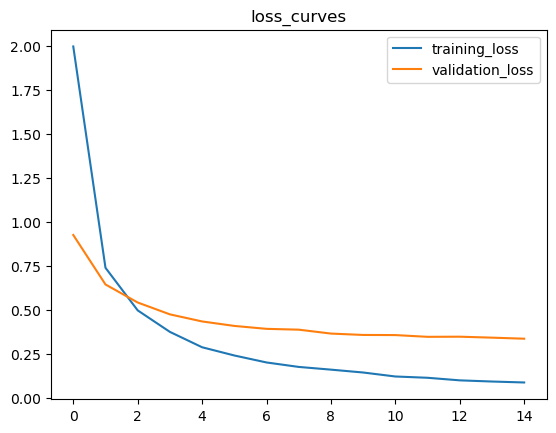

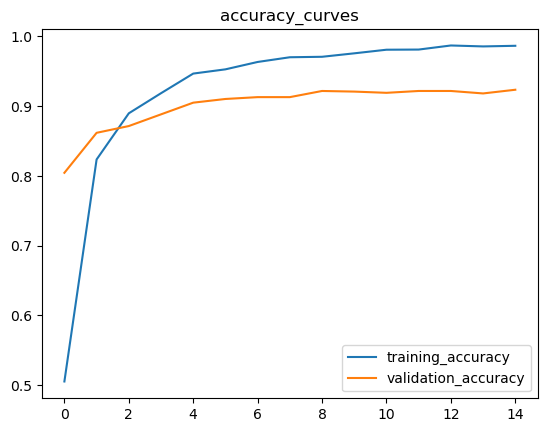

In [16]:
plot_curves(history_resnet_model)

### We have an accuracy of 98% for the training data and we have got a test accuracy of 92%. So this model is good enough for prediction on the bark dataset. 